# Análisis Exploratorio de Datos (EDA) - Stroke Dataset.
Este notebook contiene un análisis exploratorio paso a paso del dataset de predicción de ictus (stroke), siguiendo una estructura clara, visual y comentada.

## Paso 1: Carga del dataset y primeras inspecciones

In [76]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("brain_stroke_plus.csv")

# Mostrar las primeras filas
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


In [77]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5516 non-null   object 
 1   age                5516 non-null   float64
 2   hypertension       5516 non-null   int64  
 3   heart_disease      5516 non-null   int64  
 4   ever_married       5516 non-null   object 
 5   work_type          5516 non-null   object 
 6   Residence_type     5516 non-null   object 
 7   avg_glucose_level  5516 non-null   float64
 8   bmi                5376 non-null   float64
 9   smoking_status     5371 non-null   object 
 10  stroke             5516 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 474.2+ KB


In [78]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5516.000000,5516.000000,5516.000000,5516.000000,5376.000000,5516.000000
mean,45.832364,0.111131,0.073423,108.119755,28.584133,0.141951
std,23.071348,0.314323,0.260853,47.046806,6.792980,0.349031
min,0.080000,0.000000,0.000000,55.010000,14.000000,0.000000
25%,28.000000,0.000000,0.000000,77.520000,23.800000,0.000000
50%,48.000000,0.000000,0.000000,92.590000,28.200000,0.000000
75%,65.000000,0.000000,0.000000,116.215000,32.700000,0.000000
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000


In [79]:
df[('smoking_status')].isna().sum()

np.int64(145)

## Reemplazar valores nulos en smoking_status con 'Unknown'

In [80]:
df['smoking_status'] = df['smoking_status'].fillna('Unknown')

## Para BMI, usaremos la mediana por ser menos sensible a valores extremos

In [81]:
bmi_median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(bmi_median)

## Verificar que no hay más valores nulos

In [82]:
print("\nValores nulos después del procesamiento:")
print(df.isnull().sum())


Valores nulos después del procesamiento:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Limpieza y verificación de datos

In [83]:
# Verificar valores nulos por columna
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [84]:
# Verificar duplicados
df.duplicated().sum()

np.int64(0)

## Análisis de desbalanceo de la variable objetivo

Fundamental es conocer la distribución de la variable `stroke` para decidir si debemos aplicar técnicas de balanceo más adelante.

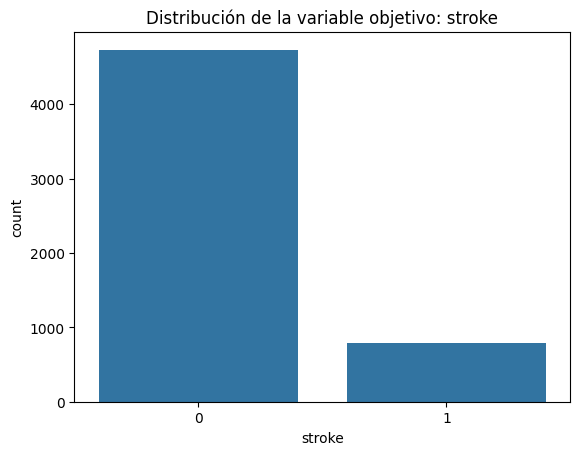

stroke
0    85.804931
1    14.195069
Name: proportion, dtype: float64

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de valores de la variable objetivo
sns.countplot(x='stroke', data=df)
plt.title('Distribución de la variable objetivo: stroke')
plt.show()

# Porcentajes
df['stroke'].value_counts(normalize=True) * 100

## Análisis de variables categóricas

Distribución de frecuencias para cada variable categórica.

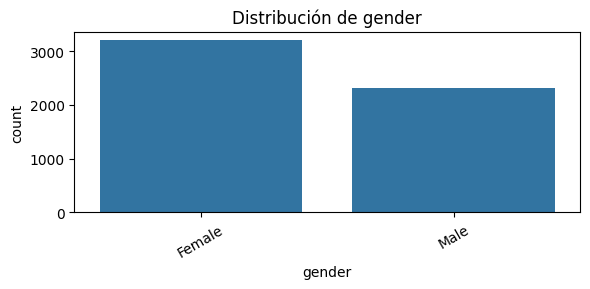

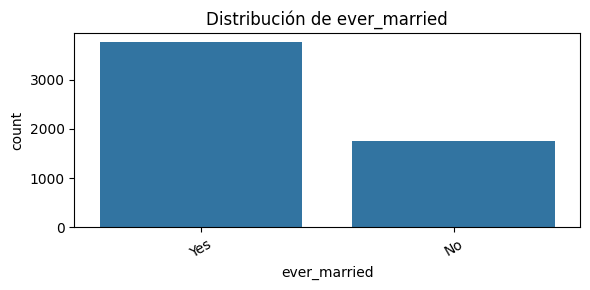

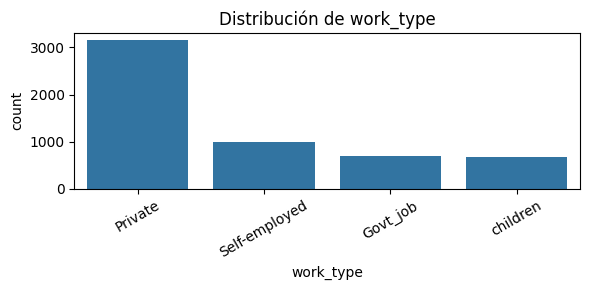

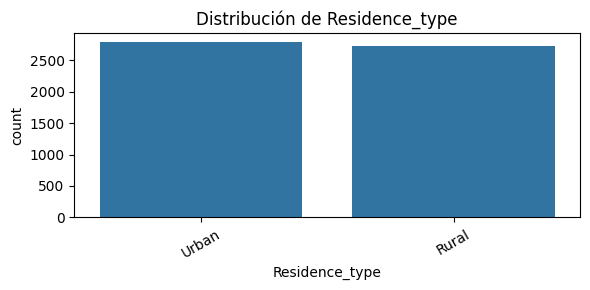

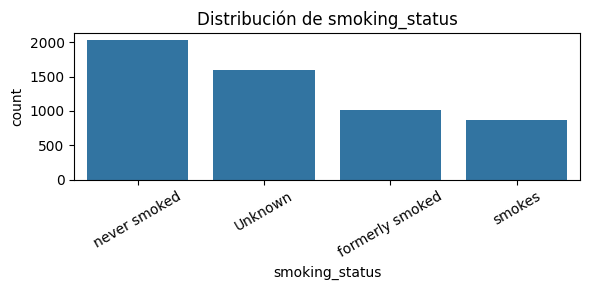

In [86]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Análisis de variables numéricas

Distribución de variables numéricas para detectar outliers y comprender mejor su comportamiento.

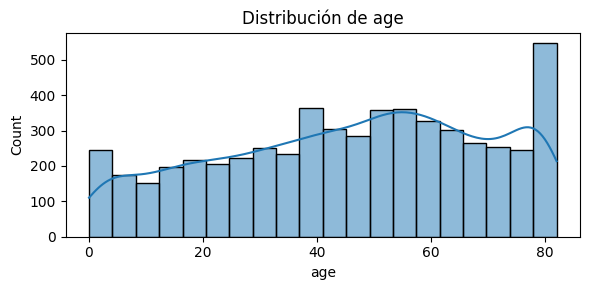

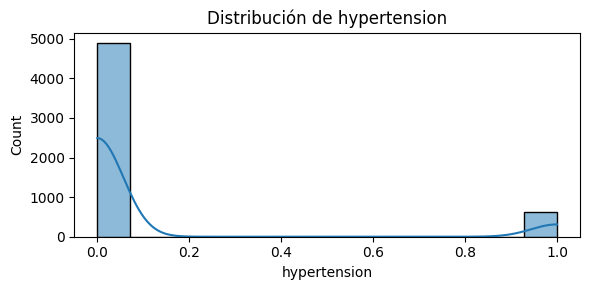

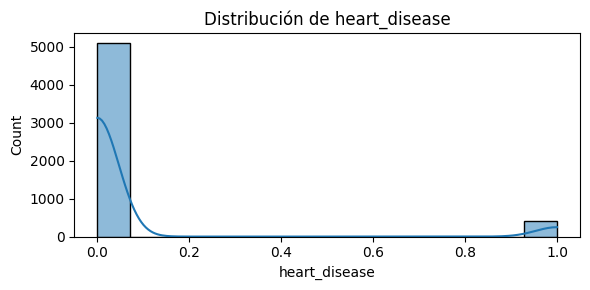

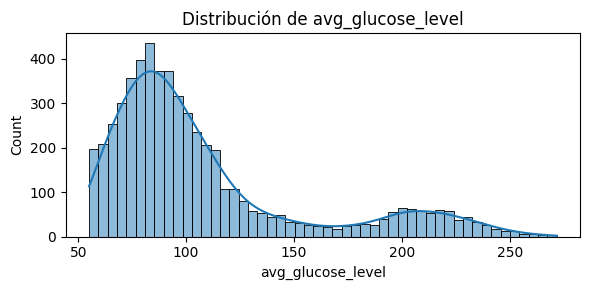

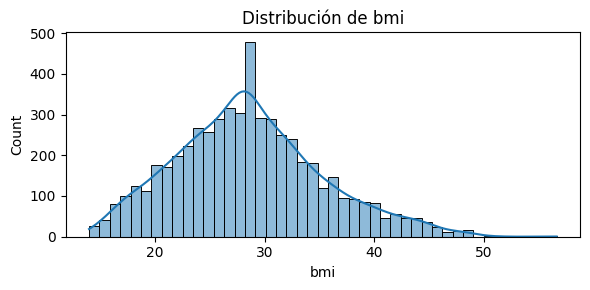

In [87]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('stroke')

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

## Análisis bivariado con la variable objetivo `stroke`

exploramos cómo se relacionan las variables explicativas con la variable objetivo `stroke`. Esto nos ayuda a identificar patrones o posibles predictores relevantes para el modelo.

#### Comparación de variables numéricas según `stroke`


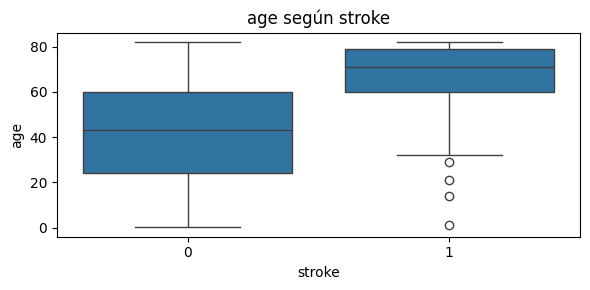

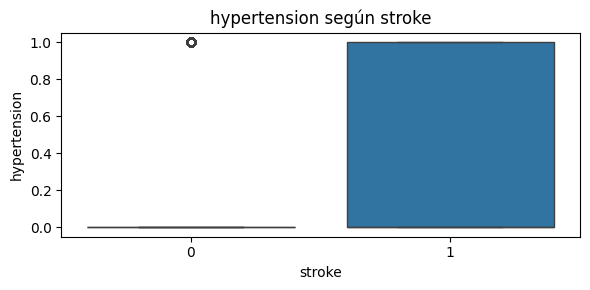

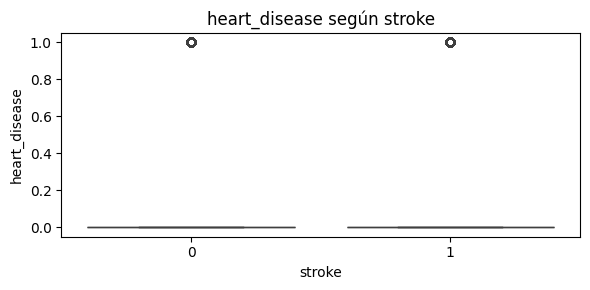

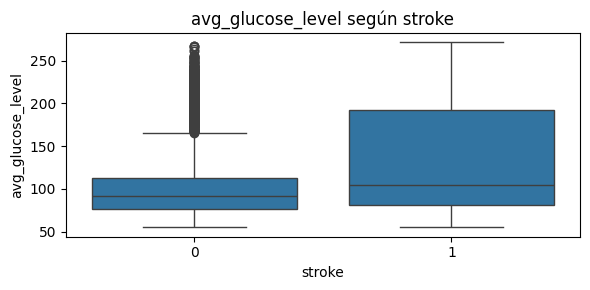

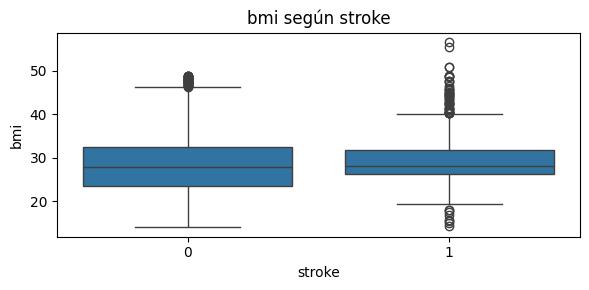

In [88]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} según stroke')
    plt.tight_layout()
    plt.show()

#### Distribución de variables categóricas según `stroke`

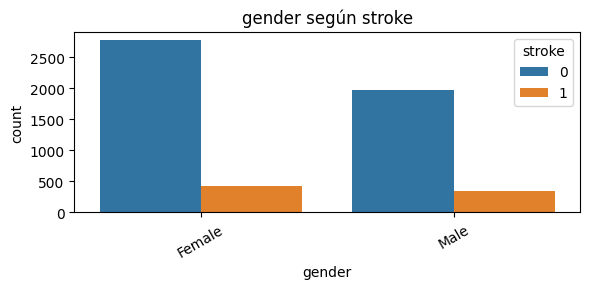

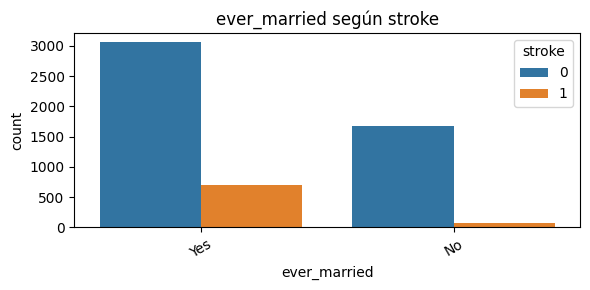

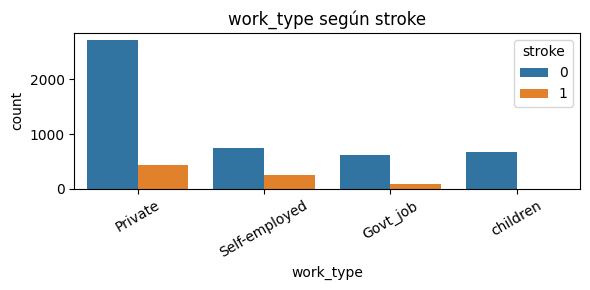

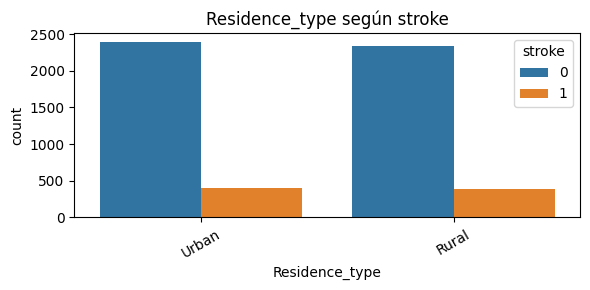

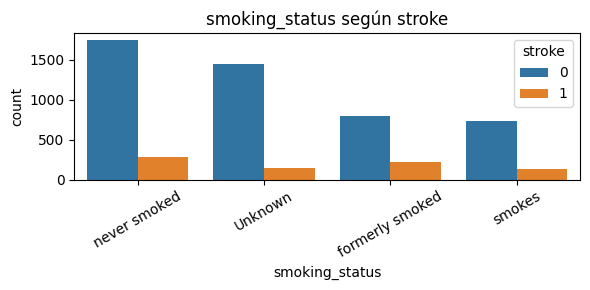

In [89]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='stroke', order=df[col].value_counts().index)
    plt.title(f'{col} según stroke')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Análisis avanzado y creación de nuevas variables

Profundizamos en la estructura del dataset para detectar valores extremos, crear nuevas variables que puedan mejorar la capacidad predictiva del modelo y preparamos el terreno para el preprocesamiento.

#### Detección de posibles outliers en variables numéricas

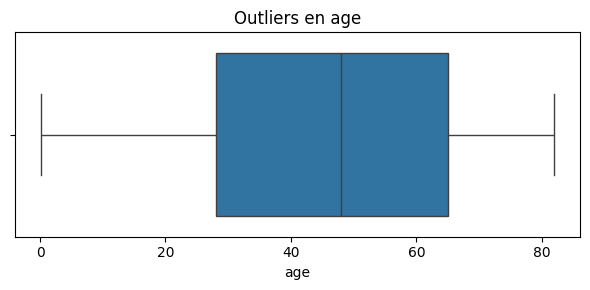

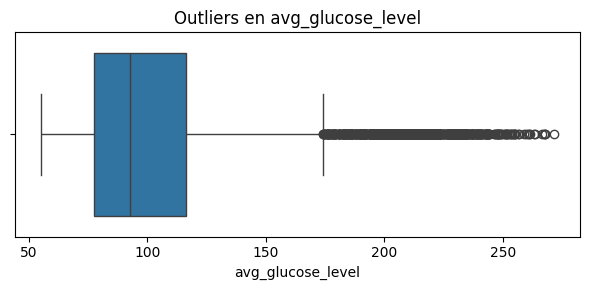

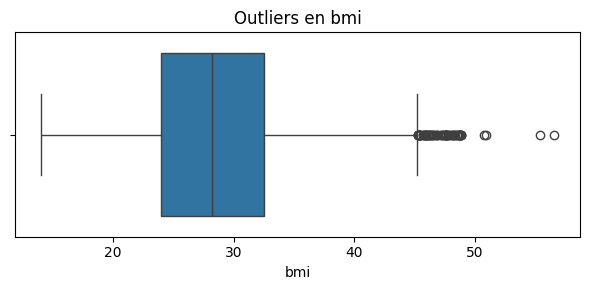

In [90]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.tight_layout()
    plt.show()

#### Creación de variable age_group

In [91]:
# Crear categorías de edad
""" df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 75, 100],
                         labels=['0-18', '19-35', '36-55', '56-75', '76+'])

# Visualizar distribución cruzada con stroke
sns.countplot(data=df, x='age_group', hue='stroke')
plt.title('Stroke por grupo de edad')
plt.show() """

" df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 75, 100],\n                         labels=['0-18', '19-35', '36-55', '56-75', '76+'])\n\n# Visualizar distribución cruzada con stroke\nsns.countplot(data=df, x='age_group', hue='stroke')\nplt.title('Stroke por grupo de edad')\nplt.show() "

#### Análisis del valor 'Unknown' en `smoking_status`

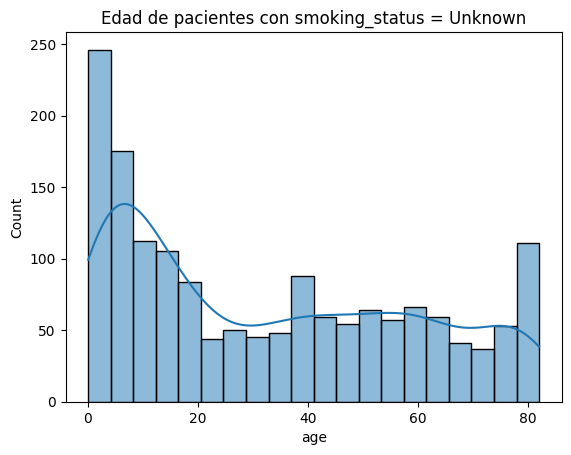

In [92]:
# Ver distribución por edad para valores Unknown en smoking_status
sns.histplot(data=df[df['smoking_status'] == 'Unknown'], x='age', bins=20, kde=True)
plt.title('Edad de pacientes con smoking_status = Unknown')
plt.show()

## Conclusiones del EDA

- La variable `stroke` está desbalanceada (~5%).
- Se detectan posibles outliers en edad, glucosa y BMI.
- Las variables `heart_disease` y `hypertension` están correlacionadas con stroke.
- Se ha creado la variable `age_group` con valor predictivo potencial.
- Hay un porcentaje importante de `Unknown` en `smoking_status`.

## Normalización y transformación de los datos

- "gender": convertir de objeto a binario
- "ever_married": convertir de objeto a binario
- "work_type": convertir de objeto a binario
- "Residence_type": convertir de objeto a binario
- "smoking_status": convertir de objeto a binario

In [93]:
# lista de columnas categóricas a convertir
multiclass_columns = ["work_type", "smoking_status"]

# usamos get_dummies para convertir las columnas categóricas en variables dummy
df = pd.get_dummies(df, columns=multiclass_columns, drop_first=True)

# aseguramos que los dummies están como enteros (0/1)
dummy_cols = [col for col in df.columns if any(prefix in col for prefix in multiclass_columns)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [94]:
# convertir las columnas binarias a enteros (0/1)
binary_columns = ["gender", "ever_married", "Residence_type"]
mapping_dict = {
    "gender": {"Male": 1, "Female": 0},
    "ever_married": {"Yes": 1, "No": 0},
    "Residence_type": {"Urban": 1, "Rural": 0}
}

for col in binary_columns:
    df[col] = df[col].map(mapping_dict[col])

In [95]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,3.0,0,0,0,0,95.12,18.0,0,0,0,1,0,0,0
1,1,58.0,1,0,1,1,87.96,39.2,0,1,0,0,0,1,0
2,0,8.0,0,0,0,1,110.89,17.6,0,1,0,0,0,0,0
3,0,70.0,0,0,1,0,69.04,35.9,0,1,0,0,1,0,0
4,0,52.0,0,0,1,1,77.59,17.7,0,1,0,0,1,0,0


In [96]:
df.to_csv("brain_s.csv", index=False)